In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from io import StringIO
import clean as c
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model, svm
from sklearn.preprocessing import StandardScaler

In [2]:
df = c.df_b
df1 = c.df1
df2 = c.df2
feats = c.feats

In [3]:
feats

['Symptom Severity (1-10)',
 'Sleep Quality (1-10)',
 'Mood Score (1-10)',
 'Stress Level (1-10)',
 'Treatment Progress (1-10)',
 'Med_n',
 'Therapy_n',
 'Emot_n',
 'Diag_n']

In [4]:
X = df1[feats]
y = df1['Out_b']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [5]:
# Fit Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Evaluate Accuracy
train_accuracy = logreg.score(X_train, y_train)
test_accuracy = logreg.score(X_test, y_test)

print(f"Logistic Regression Training Accuracy: {train_accuracy:.3f}")
print(f"Logistic Regression Testing Accuracy: {test_accuracy:.3f}")

Logistic Regression Training Accuracy: 0.570
Logistic Regression Testing Accuracy: 0.530


In [6]:
X = df1[feats]
y = df1['Out_b'] # for no change & improved 
model = linear_model.LogisticRegression()
model.fit(X,y)

importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.coef_[0]
}).sort_values(by='Importance', ascending=False)

print(importance)

                     Feature  Importance
1       Sleep Quality (1-10)    0.313743
0    Symptom Severity (1-10)    0.171824
7                     Emot_n    0.066355
5                      Med_n    0.021952
6                  Therapy_n   -0.056508
8                     Diag_n   -0.070840
2          Mood Score (1-10)   -0.145281
3        Stress Level (1-10)   -0.206206
4  Treatment Progress (1-10)   -0.236050


In [7]:
X = df2[feats]
y = df2['Out_b'] # for no change & deter
model = linear_model.LogisticRegression()
model.fit(X,y)

importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.coef_[0]
}).sort_values(by='Importance', ascending=False)

print(importance)

                     Feature  Importance
1       Sleep Quality (1-10)    0.372764
3        Stress Level (1-10)    0.365235
0    Symptom Severity (1-10)    0.210080
8                     Diag_n    0.080820
6                  Therapy_n    0.077617
7                     Emot_n   -0.024278
5                      Med_n   -0.103362
2          Mood Score (1-10)   -0.249001
4  Treatment Progress (1-10)   -0.536486


In [8]:


model = linear_model.LogisticRegression(C=1e20, random_state = 42)
model.fit(X, y)
b = model.intercept_
w = model.coef_[0]


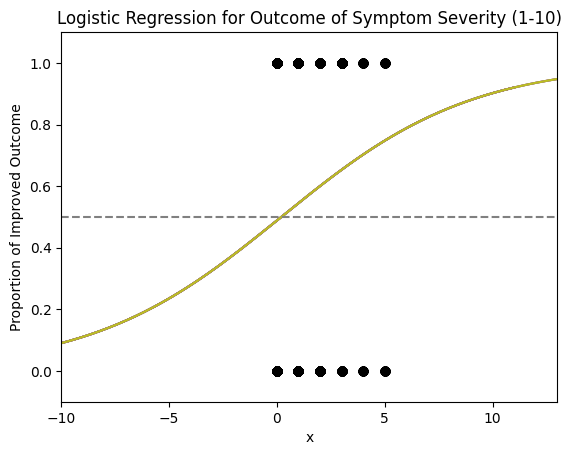

In [10]:
plt.plot(X, y, 'o', color='black', label=r'data $\{(x_i, y_i)\}$')
plt.title('Logistic Regression for Outcome of Symptom Severity (1-10)')
plt.xlabel('x')
plt.ylabel('Proportion of Improved Outcome')
plt.xlim(-10, 13)
margin = 0.1
plt.ylim(-(0 + margin), 1 + margin)

xplot = np.linspace(X.min() - 10, X.max() + 10, num=500)
yplot = 1 / (1 + np.exp(-(w[0] * xplot + b)))
plt.plot(xplot, yplot, label=r'logistic curve $\hat{P}(y = 1)$')
plt.axhline(0.5, color='gray', linestyle='--', label='Decision Boundary')